# Proyecto 1: Clasificación de Texto e Identificacion de Desordenes Mentales en Post de Reddit

- Base de datos: www.kaggle.com/sid321axn/amazon-alexa-reviews

# Etapa 1: Importación de las bibliotecas

In [207]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.19.0'

# Etapa 2: Importación de la base de datos

In [208]:
ruta_tsv = 'mental_disorders_reddit.csv'
df_reddit = pd.read_csv(ruta_tsv)
df_reddit.head()

,title,selftext,created_utc,over_18,subreddit
0,Life is so pointless without others,Does anyone else think the most important part...,1650356960,False,BPD
1,Cold rage?,Hello fellow friends 😄\n\nI'm on the BPD spect...,1650356660,False,BPD
2,I don’t know who I am,My [F20] bf [M20] told me today (after I said ...,1650355379,False,BPD
3,HELP! Opinions! Advice!,"Okay, I’m about to open up about many things I...",1650353430,False,BPD
4,help,[removed],1650350907,False,BPD


In [209]:
df_reddit.shape

(701787, 5)

In [210]:
df_reddit.keys()

Index(['title', 'selftext', 'created_utc', 'over_18', 'subreddit'], dtype='object')

In [211]:
df_reddit.head()

,title,selftext,created_utc,over_18,subreddit
0,Life is so pointless without others,Does anyone else think the most important part...,1650356960,False,BPD
1,Cold rage?,Hello fellow friends 😄\n\nI'm on the BPD spect...,1650356660,False,BPD
2,I don’t know who I am,My [F20] bf [M20] told me today (after I said ...,1650355379,False,BPD
3,HELP! Opinions! Advice!,"Okay, I’m about to open up about many things I...",1650353430,False,BPD
4,help,[removed],1650350907,False,BPD


In [212]:
df_reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701787 entries, 0 to 701786
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   title        701741 non-null  object
 1   selftext     668096 non-null  object
 2   created_utc  701787 non-null  int64 
 3   over_18      701787 non-null  bool  
 4   subreddit    701787 non-null  object
dtypes: bool(1), int64(1), object(3)
memory usage: 22.1+ MB


In [213]:
df_reddit.describe()

,created_utc
count,7.017870e+05
mean,1.623510e+09
std,4.888599e+07
min,1.290203e+09
25%,1.611392e+09
50%,1.640838e+09
75%,1.654837e+09
max,1.669253e+09


In [214]:
df_reddit['subreddit'].value_counts()

subreddit
BPD              241116
Anxiety          173990
depression       156972
mentalillness     53232
bipolar           51112
schizophrenia     25365
Name: count, dtype: int64

# Etapa 3: Visualización de los datos

/tmp/ipykernel_24130/2433550040.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='subreddit', data=df_reddit, palette='Set2');


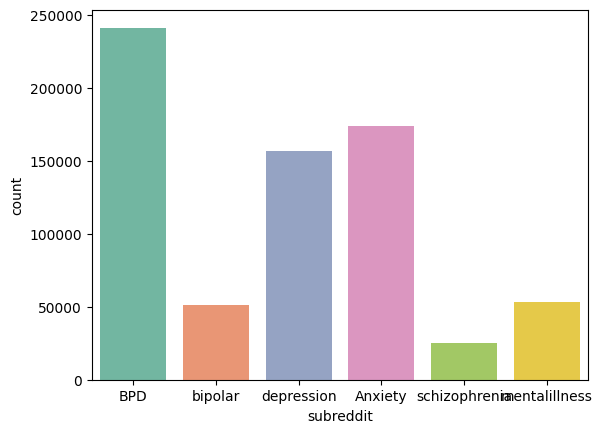

In [ ]:
sns.countplot(x='subreddit', data=df_reddit, palette='Set2');

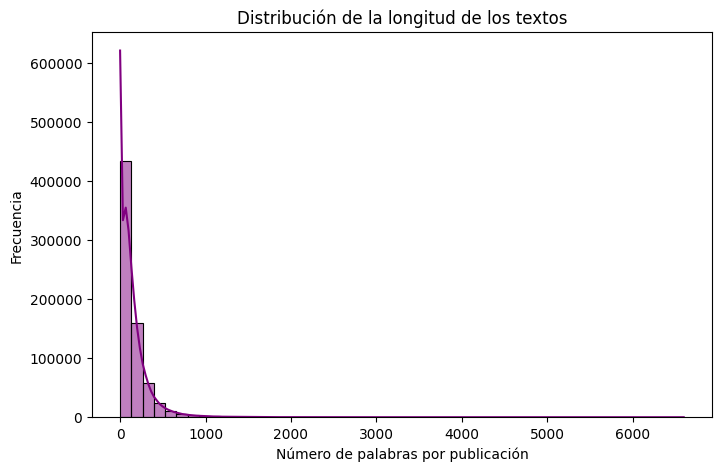

count    701787.000000
mean        144.371797
std         193.288892
min           0.000000
25%          27.000000
50%          94.000000
75%         191.000000
max        6597.000000
Name: text_length, dtype: float64

In [216]:
# Nueva columna con longitud de cada texto
df_reddit['text_length'] = df_reddit['selftext'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8,5))
sns.histplot(df_reddit['text_length'], bins=50, kde=True, color='purple')
plt.title('Distribución de la longitud de los textos')
plt.xlabel('Número de palabras por publicación')
plt.ylabel('Frecuencia')
plt.show()

df_reddit['text_length'].describe()


# Etapa 4: Limpieza de datos

In [217]:
df_reddit=df_reddit.sample(n=10000, random_state=42)

In [218]:
df_reddit.isnull().sum()

title            0
selftext       493
created_utc      0
over_18          0
subreddit        0
text_length      0
dtype: int64

In [219]:
df_reddit.dropna(inplace=True)

In [291]:
df_reddit.isnull().sum()

selftext          0
subreddit         0
over18_encoded    0
dtype: int64

In [292]:
df_reddit.describe()

,over18_encoded
count,8329.000000
mean,0.023292
std,0.150839
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
df_reddit.drop(df_reddit[(df_reddit['selftext'] =='\\[removed\\]')].index, inplace=True)
df_reddit.drop(df_reddit[(df_reddit['selftext'] =='[removed]')].index, inplace=True)

In [223]:
df_reddit = df_reddit[['over_18', 'selftext', 'subreddit']]

In [224]:
df_reddit.head()

,over_18,selftext,subreddit
2708,False,What the title says. I hate myself so much and...,BPD
318163,False,"So, today I thought ""I kinda wanna sit on the ...",depression
701414,False,I've been dealing with my mother in law's delu...,mentalillness
206683,False,An ex-fling and later friend I strongly suspec...,BPD
154117,False,This is my first time posting on this sub-Redd...,BPD


In [225]:
df_reddit.shape

(8339, 3)

In [226]:
import re
import string

In [227]:
def limpiar_texto(texto):
    # Convertimos a minúsculas
    texto = texto.lower()

    # Eliminamos URLs
    texto = re.sub(r'http\S+|www\S+|https\S+', '', texto, flags=re.MULTILINE)

    # Eliminamos etiquetas HTML
    texto = re.sub(r'<.*?>', '', texto)

    # Eliminamos emojis y caracteres no ASCII
    texto = texto.encode('ascii', 'ignore').decode('utf-8')

    # Eliminamos saltos de línea y tabs
    texto = texto.replace('\n', ' ').replace('\r', ' ').replace('\t', ' ')

    # Eliminamos signos de puntuación
    texto = texto.translate(str.maketrans('', '', string.punctuation))

    # Eliminamos números
    texto = re.sub(r'\d+', '', texto)

    # Eliminamos espacios múltiples
    texto = re.sub(r'\s+', ' ', texto).strip()

    return texto

In [228]:
df_reddit['selftext'] = df_reddit['selftext'].apply(limpiar_texto)
# df_reddit['title'] = df_reddit['title'].apply(limpiar_texto)
df_reddit.head(10)

,over_18,selftext,subreddit
2708,False,what the title says i hate myself so much and ...,BPD
318163,False,so today i thought i kinda wanna sit on the ed...,depression
701414,False,ive been dealing with my mother in laws delusi...,mentalillness
206683,False,an exfling and later friend i strongly suspect...,BPD
154117,False,this is my first time posting on this subreddi...,BPD
102209,False,my best friend an ex bf lol told me last night...,BPD
516137,False,i am really far from all my friends right now ...,Anxiety
409787,False,i have a friend who has depression and theres ...,depression
9140,False,this is a vent im just feeling extremely lonel...,BPD
66166,False,does anyone else feel like when other people m...,BPD


In [229]:
# Limpiar registros con texto vacío
df_reddit = df_reddit[df_reddit['selftext'].str.strip() != '']
print(f"Registros después de limpiar texto vacío: {df_reddit.shape[0]}")

Registros después de limpiar texto vacío: 8329


In [230]:
df_reddit.head()

,over_18,selftext,subreddit
2708,False,what the title says i hate myself so much and ...,BPD
318163,False,so today i thought i kinda wanna sit on the ed...,depression
701414,False,ive been dealing with my mother in laws delusi...,mentalillness
206683,False,an exfling and later friend i strongly suspect...,BPD
154117,False,this is my first time posting on this subreddi...,BPD


In [232]:
df_reddit['over18_encoded'] = df_reddit['over_18'].astype(int)
print("\nVariable over18 codificada:")
print(df_reddit['over18_encoded'].value_counts())


Variable over18 codificada:
over18_encoded
0    8135
1     194
Name: count, dtype: int64


In [234]:
df_reddit.drop(['over_18'], axis=1, inplace=True)
print("\nColumnas después de eliminar variables innecesarias:")
print(df_reddit.columns.tolist())


Columnas después de eliminar variables innecesarias:
['selftext', 'subreddit', 'over18_encoded']


In [235]:
df_reddit.head()

,selftext,subreddit,over18_encoded
2708,what the title says i hate myself so much and ...,BPD,0
318163,so today i thought i kinda wanna sit on the ed...,depression,0
701414,ive been dealing with my mother in laws delusi...,mentalillness,0
206683,an exfling and later friend i strongly suspect...,BPD,0
154117,this is my first time posting on this subreddi...,BPD,0


# Tokenización de la base de datos

In [236]:
df_reddit.isna().sum()

selftext          0
subreddit         0
over18_encoded    0
dtype: int64

In [237]:
df_reddit.head()

,selftext,subreddit,over18_encoded
2708,what the title says i hate myself so much and ...,BPD,0
318163,so today i thought i kinda wanna sit on the ed...,depression,0
701414,ive been dealing with my mother in laws delusi...,mentalillness,0
206683,an exfling and later friend i strongly suspect...,BPD,0
154117,this is my first time posting on this subreddi...,BPD,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=5000,  # Limitamos características para manejo eficiente
    min_df=2,          # Palabras deben aparecer al menos 2 veces
    max_df=0.95,       # Ignorar palabras que aparecen en >95% de documentos
    ngram_range=(1, 2)  # Incluir unigramas y bigramas
)

In [240]:
print("Aplicando vectorización TF-IDF...")
text_features = vectorizer.fit_transform(df_reddit['selftext'])
print(f"Shape de características de texto: {text_features.shape}")

Aplicando vectorización TF-IDF...
Shape de características de texto: (8329, 5000)


In [241]:
feature_names = vectorizer.get_feature_names_out()
print(f"\nPrimeras 20 características: {feature_names[:20]}")
print(f"Últimas 20 características: {feature_names[-20:]}")


Primeras 20 características: ['abandon' 'abandoned' 'abandoning' 'abandonment' 'abandonment issues'
 'abilify' 'ability' 'able' 'able handle' 'able sleep' 'able talk'
 'abnormal' 'abroad' 'absolute' 'absolutely' 'abt' 'abuse' 'abused'
 'abuser' 'abusing']
Últimas 20 características: ['yes' 'yesterday' 'yo' 'youd' 'youll' 'young' 'young age' 'younger'
 'youre' 'youre doing' 'youre going' 'youre just' 'youtube' 'youve' 'yrs'
 'zero' 'zoloft' 'zone' 'zoning' 'zoom']


In [242]:
text_df = pd.DataFrame(text_features.toarray(), 
                      columns=[f'text_feature_{i}' for i in range(text_features.shape[1])])

In [243]:
df_reddit.reset_index(drop=True, inplace=True)
text_df.reset_index(drop=True, inplace=True)

In [245]:
df_final = pd.concat([df_reddit[['over18_encoded']], text_df], axis=1)
print(f"\nShape del dataset final: {df_final.shape}")
df_final.head()


Shape del dataset final: (8329, 5001)


,over18_encoded,text_feature_0,text_feature_1,text_feature_2,text_feature_3,text_feature_4,text_feature_5,text_feature_6,text_feature_7,text_feature_8,...,text_feature_4990,text_feature_4991,text_feature_4992,text_feature_4993,text_feature_4994,text_feature_4995,text_feature_4996,text_feature_4997,text_feature_4998,text_feature_4999
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [246]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_reddit['subreddit'])
num_classes = len(label_encoder.classes_)

print(f"\nNúmero de clases: {num_classes}")
print("Mapeo de clases:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"{i}: {class_name}")


Número de clases: 6
Mapeo de clases:
0: Anxiety
1: BPD
2: bipolar
3: depression
4: mentalillness
5: schizophrenia


In [247]:
from tensorflow.keras.utils import to_categorical

y_categorical = to_categorical(y_encoded, num_classes=num_classes)
print(f"Shape del target categórico: {y_categorical.shape}")

Shape del target categórico: (8329, 6)


In [248]:
X = df_final.drop(columns=['subreddit'] if 'subreddit' in df_final.columns else [])
y = y_categorical

In [249]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y_encoded
)

In [250]:
X_train.shape

(6663, 5001)

In [251]:
X_test.shape

(1666, 5001)

# Etapa 5: Construcción y entrenamiento del modelo

In [274]:
del classifier
del epochs_hist

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

input_dim = X_train.shape[1]
classifier = Sequential()
classifier.add(Dense(units = 1024, activation='relu', input_shape=(input_dim, )))
# classifier.add(Dropout(0.3))
classifier.add(Dense(units = 512, activation='relu'))
# classifier.add(Dropout(0.2))
classifier.add(Dense(units = 256, activation='relu'))
classifier.add(Dense(units = 128, activation='relu'))
classifier.add(Dense(units = num_classes, activation='softmax'))

early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=15,
    # mode='min',
    restore_best_weights=True,
    verbose=1
)

/home/dherrera/anaconda3/envs/tf-gpu-py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [276]:
classifier.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 1024)           │     5,122,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,811,846 (22.17 MB)

 Trainable params: 5,811,846 (22.17 MB)

 Non-trainable params: 0 (0.00 B)

In [278]:
classifier.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [279]:
# epochs_hist = classifier.fit(X_train, y_train, epochs=20)
epochs_hist = classifier.fit(
    X_train, 
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=early_stopping_callback
)

Epoch 1/50


2025-08-02 06:10:24.822448: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_250', 4 bytes spill stores, 4 bytes spill loads

2025-08-02 06:10:24.908730: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_229', 488 bytes spill stores, 488 bytes spill loads

2025-08-02 06:10:25.145717: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_229_0', 468 bytes spill stores, 1028 bytes spill loads

2025-08-02 06:10:25.432136: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_229', 832 bytes spill stores, 832 bytes spill loads

2025-08-02 06:10:25.441245: I externa

160/167 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4778 - loss: 1.3361

2025-08-02 06:10:30.799752: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_229', 212 bytes spill stores, 244 bytes spill loads

2025-08-02 06:10:30.935878: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_229_0', 592 bytes spill stores, 1236 bytes spill loads

2025-08-02 06:10:30.978887: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_229', 624 bytes spill stores, 624 bytes spill loads

2025-08-02 06:10:30.987448: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_229', 492 bytes spill stores, 492 bytes spill loads

2025-08-02 06:10:31.491993: I ext

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4816 - loss: 1.3285

2025-08-02 06:10:37.899758: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_86', 4 bytes spill stores, 4 bytes spill loads

2025-08-02 06:10:38.006434: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_65', 4 bytes spill stores, 4 bytes spill loads

2025-08-02 06:10:38.020107: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_65', 492 bytes spill stores, 492 bytes spill loads

2025-08-02 06:10:38.027321: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_65', 212 bytes spill stores, 244 bytes spill loads

2025-08-02 06:10:38.070093: I external/local_xla

167/167 ━━━━━━━━━━━━━━━━━━━━ 16s 60ms/step - accuracy: 0.4821 - loss: 1.3274 - val_accuracy: 0.6414 - val_loss: 1.0119
Epoch 2/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8139 - loss: 0.5600 - val_accuracy: 0.6369 - val_loss: 1.1150
Epoch 3/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9293 - loss: 0.1984 - val_accuracy: 0.6047 - val_loss: 1.8114
Epoch 4/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9811 - loss: 0.0640 - val_accuracy: 0.6234 - val_loss: 1.9931
Epoch 5/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9946 - loss: 0.0244 - val_accuracy: 0.6189 - val_loss: 2.2980
Epoch 6/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9935 - loss: 0.0236 - val_accuracy: 0.6347 - val_loss: 2.6026
Epoch 7/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9966 - loss: 0.0163 - val_accuracy: 0.6392 - val_loss: 2.4079
Epoch 8/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9978 - loss: 0.0096 - val_accuracy: 0.6279 - va

# Etapa 6: Validación del modelo

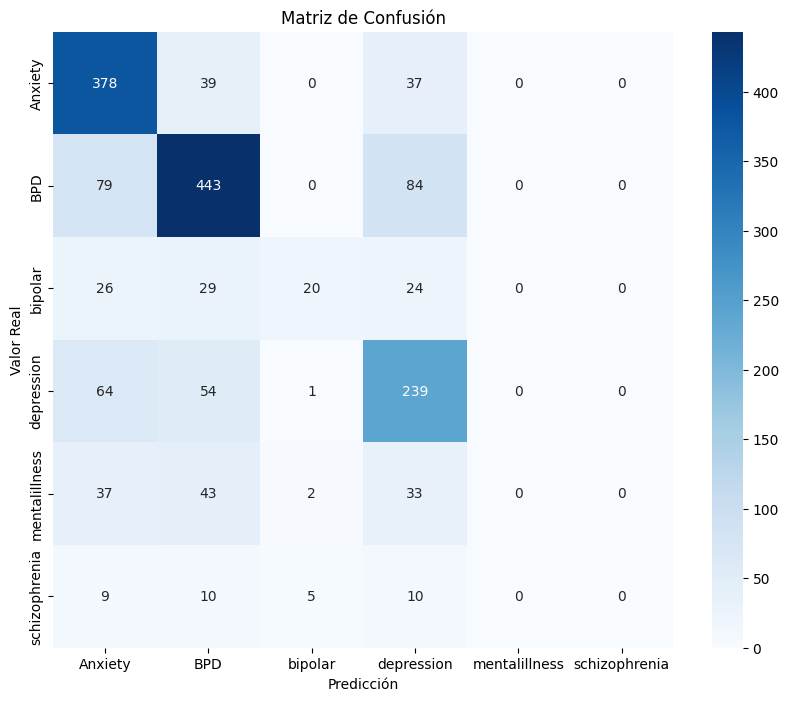

In [289]:
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

In [283]:
from sklearn.metrics import classification_report, confusion_matrix

print("\nReporte de clasificación:")
print(classification_report(y_test_classes, y_pred_classes, 
                          target_names=label_encoder.classes_))


Reporte de clasificación:
               precision    recall  f1-score   support

      Anxiety       0.64      0.83      0.72       454
          BPD       0.72      0.73      0.72       606
      bipolar       0.71      0.20      0.31        99
   depression       0.56      0.67      0.61       358
mentalillness       0.00      0.00      0.00       115
schizophrenia       0.00      0.00      0.00        34

     accuracy                           0.65      1666
    macro avg       0.44      0.41      0.39      1666
 weighted avg       0.60      0.65      0.61      1666



/home/dherrera/anaconda3/envs/tf-gpu-py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dherrera/anaconda3/envs/tf-gpu-py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dherrera/anaconda3/envs/tf-gpu-py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [281]:
test_loss, test_accuracy = classifier.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy en test: {test_accuracy:.4f}")
print(f"Loss en test: {test_loss:.4f}")

Accuracy en test: 0.6483
Loss en test: 1.0133


In [282]:
y_pred = classifier.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


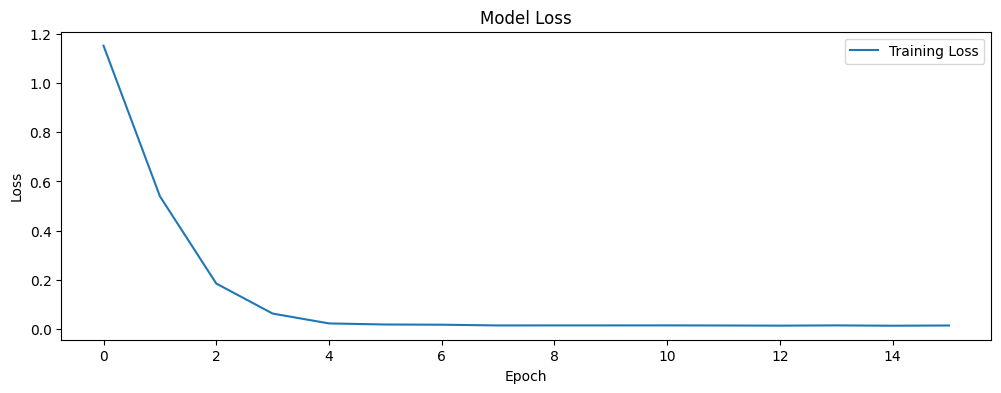

In [286]:
plt.figure(figsize=(12, 4))

plt.plot(epochs_hist.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

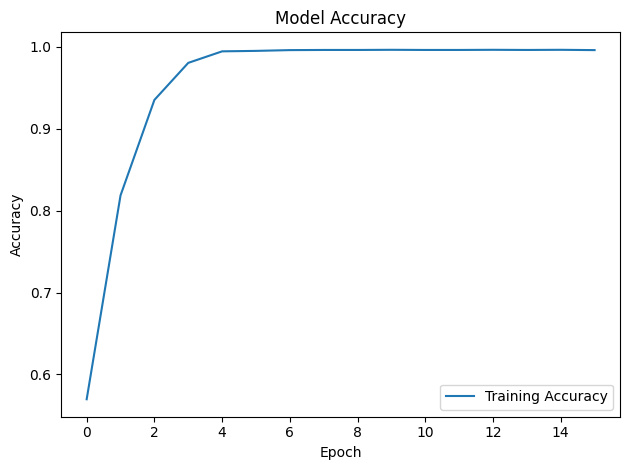

In [288]:
plt.plot(epochs_hist.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()